# **TECHIN 513: Managing Data and Signal Processing ICTE 2**

You task is load  RSSI database from "RSSI.csv" and plot a path map with X and Y.

      TO DO
      1.   Load CSV file "RSSI.csv"
      2.   Check and modify data (check for missing values NaN)
      3.   Count the number of times there was no signal from the router in each column except X and Y (-100 represent no signal from that WiFi router)
      4.   Find top 10 of most usable WiFi router
      5.   Plot a map with X and Y

In [12]:
# 1)Load CSV file "RSSI.csv"
# 2)Check and modify data (check for missing values NaN)
# 3)Count the number of times there was no signal from the router in each column except X and Y
#   (-100 represent no signal from that WiFi router)
# 4)Find top 10 of most usable WiFi router
# 5)Plot a map with X and Y

In [13]:
import pandas as pd
import numpy as np

# step 1: load file "RSSI.csv"

RSSI = pd.read_csv("RSSI.csv", header=0)

In [14]:
# step 2: check missing values

# according to #3, empty values are already represented as -100 instead of NaN, done with fillna()
# we reverse the change for the sake of this question
RSSI_mod = RSSI.replace(-100, np.nan)

RSSI_mod

,X,Y,00:bb:60:5c:28:30,2c:30:33:49:f1:51,a0:63:91:d9:cf:bb,ac:23:16:eb:20:d1,ac:23:16:eb:20:d2,ac:23:16:eb:20:d3,ac:23:16:eb:20:e1,ac:23:16:eb:20:e2,...,ac:23:16:eb:4d:a1,ac:23:16:ec:70:d3,ac:23:16:eb:3d:51,ac:23:16:eb:3b:e1,ac:23:16:eb:4b:e2,ac:23:16:ec:5d:a3,ac:23:16:ec:6f:14,ac:23:16:eb:46:91,ac:23:16:eb:46:93,ac:23:16:eb:44:63
0,-4.729264,-8.266995,NaN,NaN,NaN,-79,-79.0,-79.0,-79.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-5.504700,-8.094806,-83.0,NaN,NaN,-79,-79.0,-79.0,-79.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-5.807762,-7.380555,-83.0,NaN,NaN,-79,-79.0,-79.0,-79.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-6.008443,-6.611304,-82.0,NaN,NaN,-79,-79.0,NaN,-79.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-6.217061,-5.797879,-82.0,NaN,NaN,-79,-79.0,NaN,-79.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,-24.432861,-7.485832,-68.0,NaN,NaN,-79,-79.0,-79.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,-24.797718,-8.147212,-68.0,NaN,NaN,-79,-79.0,-79.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,-24.850538,-7.899585,-80.0,NaN,NaN,-79,-79.0,-79.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,-24.725263,-8.245343,-80.0,NaN,NaN,-79,-79.0,-79.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# step 3: count empty values

# drops X and Y for easier comparison
# router_data = RSSI_mod.drop(['X', 'Y'], axis=1)

signals = RSSI_mod.iloc[:, 2:229]

# adds a column with the count of valid signals for each router
valid = signals.notnull().sum(axis=1)
RSSI_mod = pd.concat([RSSI_mod, valid.rename('valid')], axis=1)

# # adds a column with the count of empty signals for each router
empty = signals.isnull().sum(axis=1)
RSSI_mod = pd.concat([RSSI_mod, empty.rename('empty')], axis=1)

empty

0       163
1       163
2       163
3       163
4       163
       ... 
1007    164
1008    164
1009    164
1010    164
1011    162
Length: 1012, dtype: int64

In [16]:
# step 4: rank valid counts

# adds a column with the ranking of routers' usability
ranking = valid.rank(ascending=0)
RSSI_mod = pd.concat([RSSI_mod, ranking.rename('ranking')], axis=1)

# sorts the routers by their usability
RSSI_rank = RSSI_mod.set_index('ranking').sort_index()

# finds the top 10 routers
RSSI_top = RSSI_rank.head(10)

RSSI_top.loc[:, ['X', 'Y', 'valid']]

,X,Y,valid
ranking,,,
3.5,-28.587851,57.727020,66
3.5,-27.681598,57.748005,66
3.5,-26.745995,57.638415,66
3.5,-25.844334,57.535345,66
3.5,-24.888309,-21.477894,66
3.5,-24.294086,-20.869478,66
91.0,-8.498357,34.605604,65
91.0,-7.716759,35.101800,65
91.0,-7.615818,36.054524,65


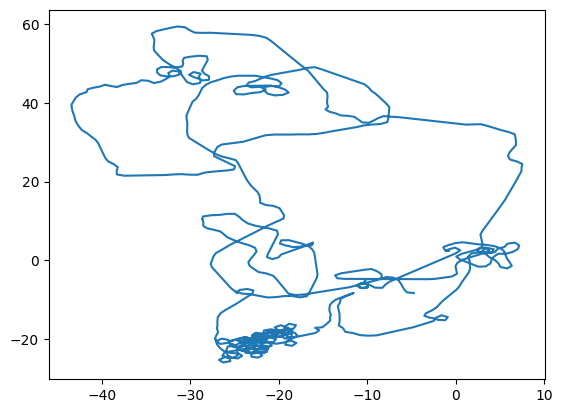

In [17]:
from matplotlib import pyplot as plt

# step 5: plot two-axis map

# plot x and y axes
plt.plot(RSSI['X'], RSSI['Y'])
plt.show()